In [31]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import datetime as dt
import numpy as np
from itertools import islice
import urllib
import dateutil
import matplotlib.pyplot as plt

In [2]:
yf.pdr_override()

In [3]:
sp500_filepath = ('../GA-projects/sp_500.csv')
sp_500_data = pd.read_csv(sp500_filepath)

In [4]:
sp_500_data.head()

,Id,Company,Symbol,Weight,Price,Unnamed: 5,Unnamed: 6
0,1,Microsoft Corporation,MSFT,5.138667,153.89,NaN,NaN
1,2,Apple Inc.,AAPL,4.988562,275.4,NaN,NaN
2,3,Amazon.com Inc.,AMZN,3.298944,"1,820.00",NaN,NaN
3,4,Facebook Inc. Class A,FB,1.795264,170,NaN,NaN
4,5,Berkshire Hathaway Inc. Class B,BRK.B,1.660211,195.23,NaN,NaN


In [5]:
sp_500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
Id             505 non-null int64
Company        505 non-null object
Symbol         505 non-null object
Weight         505 non-null float64
      Price    505 non-null object
Unnamed: 5     0 non-null float64
Unnamed: 6     0 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB


In [6]:
sp_500_data.Symbol

0       MSFT
1       AAPL
2       AMZN
3         FB
4      BRK.B
       ...  
500     COTY
501       HP
502      UAA
503       UA
504      NWS
Name: Symbol, Length: 505, dtype: object

In [7]:
s_set = set(sp_500_data.Symbol)

In [10]:
healthcare_tickers = 'EW BSX ABMD ABT ALGN ZBH SYK MDT HSIC HOLX ISRG BAX BDX COO MTD STE RMD XRAY WAT TFX VAR TMO PKI DGX A IQV LH REGN AMGN ALXN ILMN INCY GILD'

In [11]:
asset_manager_tickers = 'AMG AMP BEN BK BLK IVZ LM NTRS STT'

In [13]:
ohlc = pdr.get_data_yahoo(asset_manager_tickers, start="2017-01-01" )

[*********************100%***********************]  9 of 9 completed


In [19]:
ohlc['Adj Close'].head()

,AMG,AMP,BEN,BK,BLK,IVZ,LM,NTRS,STT
Date,,,,,,,,,
2017-01-03,141.380615,103.108978,36.614559,44.793835,354.607880,25.883860,27.203602,83.243950,73.130112
2017-01-04,144.891159,106.197182,37.438484,45.494316,354.818970,26.586817,28.001104,84.033302,75.916924
2017-01-05,143.116501,104.851280,36.877129,44.915257,351.038177,26.377600,27.602352,83.671135,75.372482
2017-01-06,142.796463,106.621239,36.895241,44.989967,352.653259,26.385973,27.930214,83.429688,76.073792
2017-01-09,139.092026,106.197182,36.496861,44.494957,349.092804,25.816910,27.230185,82.677475,75.086418


In [20]:
ohlc['Adj Close'].tail()

,AMG,AMP,BEN,BK,BLK,IVZ,LM,NTRS,STT
Date,,,,,,,,,
2020-04-15,59.930000,104.150002,15.310000,34.630001,443.070007,8.96,49.299999,78.889999,57.070000
2020-04-16,59.889999,101.690002,15.420000,36.139999,458.989990,8.71,49.459999,77.959999,58.500000
2020-04-17,62.950001,110.949997,16.340000,37.389999,476.869995,9.07,49.549999,80.000000,58.490002
2020-04-20,61.529999,110.110001,16.280001,36.410000,470.799988,9.09,49.610001,79.330002,58.180000
2020-04-21,60.584999,103.860001,15.955000,35.070000,473.359985,8.88,49.584999,73.970001,54.740002


In [22]:
ohlc['Adj Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 830 entries, 2017-01-03 to 2020-04-21
Data columns (total 9 columns):
AMG     830 non-null float64
AMP     830 non-null float64
BEN     830 non-null float64
BK      830 non-null float64
BLK     830 non-null float64
IVZ     830 non-null float64
LM      830 non-null float64
NTRS    830 non-null float64
STT     830 non-null float64
dtypes: float64(9)
memory usage: 64.8 KB


In [23]:
ohlc['Adj Close'].describe()

,AMG,AMP,BEN,BK,BLK,IVZ,LM,NTRS,STT
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,130.784796,135.224323,32.421196,47.602542,437.536620,22.554864,34.116148,91.299918,75.692458
std,41.587521,17.713159,5.958813,4.598524,54.438935,5.982570,5.200477,8.798642,14.074034
min,45.150002,82.879997,15.061903,27.490000,327.420013,7.610000,22.281761,62.220001,42.775978
25%,87.996038,122.162390,28.708890,44.624134,394.902237,17.671427,30.996873,84.075499,65.545439
50%,140.653313,135.407448,31.593701,48.547468,438.680237,22.163746,34.468168,90.433491,75.978943
75%,164.793823,145.795547,38.007992,50.876323,481.308090,27.738809,36.404069,99.480696,87.110718
max,210.231705,179.720001,43.207115,55.525219,568.169189,33.265003,50.237038,108.803802,105.866562


In [24]:
type(ohlc['Adj Close'])

pandas.core.frame.DataFrame

In [25]:
am_df = ohlc['Adj Close']

In [27]:
pd.rolling_corr(am_df['BLK'],am_df['AMG'])

AttributeError: module 'pandas' has no attribute 'rolling_corr'

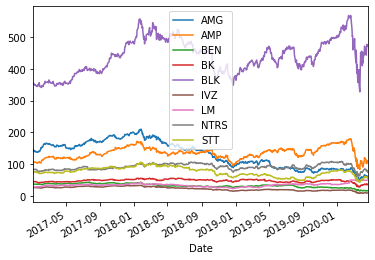

In [38]:
am_df.plot()

In [41]:
ROLLING_PERIOD = 22

In [43]:
returns = np.log(am_df)-np.log(am_df.shift(ROLLING_PERIOD))

In [82]:
returns.iloc[ROLLING_PERIOD:].corr()['BLK']

AMG     0.808275
AMP     0.815595
BEN     0.700078
BK      0.753894
BLK     1.000000
IVZ     0.801509
LM      0.359804
NTRS    0.802038
STT     0.833114
Name: BLK, dtype: float64

In [110]:
returns.rolling(ROLLING_PERIOD).corr()

AMG       AMP       BEN        BK       BLK       IVZ  \
Date                                                                          
2017-01-03 AMG        NaN       NaN       NaN       NaN       NaN       NaN   
           AMP        NaN       NaN       NaN       NaN       NaN       NaN   
           BEN        NaN       NaN       NaN       NaN       NaN       NaN   
           BK         NaN       NaN       NaN       NaN       NaN       NaN   
           BLK        NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
2020-04-21 BLK   0.952223  0.959088  0.893890  0.971716  1.000000  0.955362   
           IVZ   0.971552  0.990531  0.952234  0.968170  0.955362  1.000000   
           LM    0.888490  0.914525  0.772727  0.959697  0.944472  0.900721   
           NTRS  0.975624  0.957527  0.898245  0.957799  0.945355  0.943381   
           STT   0.976757  0.977310  0.875599  0.983039  0.940857  0.962123   

                       LM      NTRS       STT  
Date                                           
2017-01-03 AMG        NaN       NaN       NaN  
           AMP        NaN       NaN       NaN  
           BEN        NaN       NaN       NaN  
           BK         NaN       NaN       NaN  
           BLK        NaN       NaN       NaN  
...                   ...       ...       ...  
2020-04-21 BLK   0.944472  0.945355  0.940857  
           IVZ   0.900721  0.943381  0.962123  
           LM    1.000000  0.879255  0.926076  
           NTRS  0.879255  1.000000  0.972822  
           STT   0.926076  0.972822  1.000000  

[7470 rows x 9 columns]

In [117]:
def multi_period_return(period_returns):
     return np.prod(period_returns + 1) - 1

In [208]:
pr = am_df.pct_change()

In [204]:
r = pr.rolling('30D').apply(multi_period_return)

C:\Users\jackm\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [241]:
r[["BLK",'IVZ','AMG','BK','NTRS']].iloc[21:51].corr()

,BLK,IVZ,AMG,BK,NTRS
BLK,1.000000,0.904166,0.218572,0.771255,0.762257
IVZ,0.904166,1.000000,0.450816,0.752532,0.728318
AMG,0.218572,0.450816,1.000000,-0.118282,-0.191514
BK,0.771255,0.752532,-0.118282,1.000000,0.984210
NTRS,0.762257,0.728318,-0.191514,0.984210,1.000000


In [226]:
df_corrs.head()

,BLK,IVZ,AMG,BK,NTRS
Date,,,,,
2017-03-16,1.0,0.904166,0.218572,0.771255,0.762257
2017-03-17,1.0,0.902911,0.283913,0.719741,0.704877
2017-03-20,1.0,0.902942,0.333304,0.682330,0.647854
2017-03-21,1.0,0.909711,0.415881,0.660549,0.604823
2017-03-22,1.0,0.915251,0.499071,0.645675,0.560328


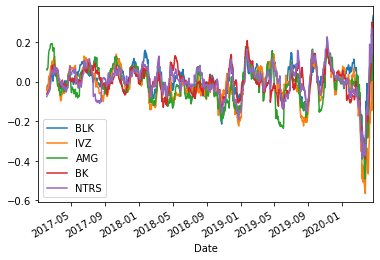

In [214]:
r[["BLK",'IVZ','AMG','BK','NTRS']].plot()

In [138]:
df_corrs = pr['BLK']\
        .rolling(window=22, min_periods=22)\
        .corr(other=pr['AMG'])\
        .dropna()

In [142]:
type(df_corrs)

pandas.core.series.Series

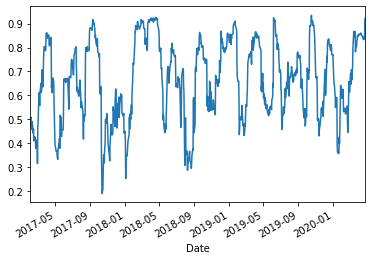

In [139]:
df_corrs.plot()

In [155]:
mask = pr.columns!='BLK'
mask = pr.columns[mask]

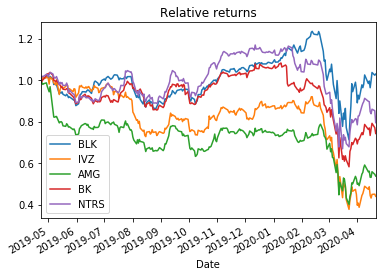

In [243]:
(am_df[['BLK','IVZ','AMG','BK','NTRS']]/am_df[['BLK','IVZ','AMG','BK','NTRS']].iloc[-252])[-252:].plot(title="Relative returns")

In [230]:
df_corrs = pd.DataFrame()
for ticker in ["BLK",'IVZ','AMG','BK','NTRS']:
    temp = r['BLK']\
        .rolling(window=30, min_periods=30)\
        .corr(other=r[ticker])\
        .dropna()
    df_corrs[ticker]=temp
    

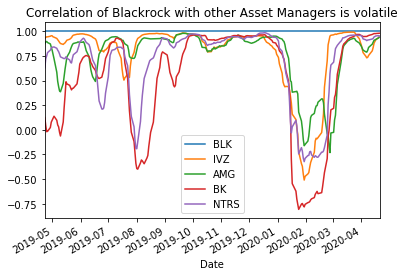

In [220]:
df_corrs.iloc[-252:].plot(title ='Correlation of Blackrock with other Asset Managers is volatile')

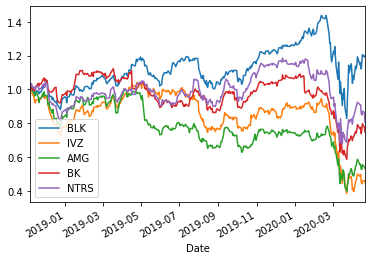

In [195]:
(am_df[['BLK','IVZ','AMG','BK','NTRS']]/am_df[['BLK','IVZ','AMG','BK','NTRS']].iloc[-365])[-365:].plot()#,'IVZ','AMG','BK','NTRS'